# Sol·lucions Projecte Final

In [2]:
import pandas as pd

df = pd.read_csv("../lessons/data/candidats1.csv")
print(df.shape)
df.head()


(10000, 23)


,DNI,Id. Empleat,Tipus de sol�licitud,CP,Telefon,DataNaix,Sexe,Email per notificacions,CP per notificacions,%Minus,...,Niv cat,Comprobar amb pol. lingüística,proba física superada,carnet conducir,examen1,examen2,examen3,examen4,examen5,Municipi
0,II257577,8070373,Certificat digital,7038,+34 098461235,20/08/2000,M,dfztat@outlook.com,7991,0.0,...,C1,True,True,Sí,6.35,4.78,NP,7.05,3.68,Consell
1,HS660732,7386220,PreZëncial,7805,+34 399253088,24/10/1991,F,avnxqe@hotmail.com,7792,0.0,...,B2,True,True,Sí,10.0,7.48,5.71,9.05,10.0,Ibiza
2,WA908227,7334248,PreZëncial,7500,+34 665691484,24/02/1974,M,rydxirj@example.com,7803,0.0,...,A2,True,True,Sí,10.0,NP,NP,2.96,5.12,Campos
3,50963304L,5531649,Certificat digital,7038,+34 934536489,14/01/1999,F,vkfbbn@yahoo.com,7603,0.0,...,B1,True,True,No,8.1,10.0,4.89,8.09,0.0,Consell
4,68499030Q,4175935,PreZëncial,7950,+34 293929218,11/08/1994,M,fovigdyjj@yahoo.com,7516,0.0,...,B2,True,True,Sí,6.34,8.67,4.76,6.11,6.05,Búger


## Nivel bàsic


- A) Arregla el nom de la columna de "Tipus de Sol·licitud" i tots els valors de "*PresZèncial" per "Presencial" 

In [41]:
# Aquestes dues activitats som per cerca una mica d'informació per google: "com put canviar el nom d'una columna?" i "Com puc canviar un valor d'una sèrie? ""
# Una altra opció és fer una nova amb els valors i eliminar la vella.
df.rename(columns = {df.columns[2]:'Tipus de Sol·licitud'}, inplace = True)

# En aquest cas, una solució alternativa és aplicar un: df["col"].apply({"PreZëncial":"Presencial"},...) però és necessari especificar la resta de valors
df[df.columns[2]].replace(to_replace = ['PreZëncial'], value = ['Presencial'],inplace=True)
# un altra opció es uan funció lambda

df.head(3)

,DNI,Id. Empleat,Tipus de Sol·licitud,CP,Telefon,DataNaix,Sexe,Email per notificacions,CP per notificacions,%Minus,...,Niv cat,Comprobar amb pol. lingüística,proba física superada,carnet conducir,examen1,examen2,examen3,examen4,examen5,Municipi
0,II257577,8070373,Certificat digital,7038,+34 098461235,20/08/2000,M,dfztat@outlook.com,7991,0.0,...,C1,True,True,Sí,6.35,4.78,NP,7.05,3.68,Consell
1,HS660732,7386220,Presencial,7805,+34 399253088,24/10/1991,F,avnxqe@hotmail.com,7792,0.0,...,B2,True,True,Sí,10.0,7.48,5.71,9.05,10.0,Ibiza
2,WA908227,7334248,Presencial,7500,+34 665691484,24/02/1974,M,rydxirj@example.com,7803,0.0,...,A2,True,True,Sí,10.0,NP,NP,2.96,5.12,Campos


- B) Pots eliminar el prefix "+34" de la columna telèfon?



In [42]:
# Hi ha moltes maneres:
# a. fer una separació / un split a l'espai +34_XXX i agafar la darrera part [-1]
print(df["Telefon"].str.split().str[-1])
# b. fer un replace, els replace sense cap valor de substitució requereix un argument molt específic: regex
print(df.Telefon.str.replace("+34 ", "",regex=False))
# c. funció Lambda: amb un replace de cada element de la sèrie 
print(df["Telefon"].map(lambda x : x.replace("+34 ", "")))


#
df["Telefon"] = df["Telefon"].str.split().str[-1]
df.head(3)






0       098461235
1       399253088
2       665691484
3       934536489
4       293929218
          ...    
9995    383436630
9996    516464586
9997    100503795
9998    346924141
9999    307634844
Name: Telefon, Length: 10000, dtype: object
0       098461235
1       399253088
2       665691484
3       934536489
4       293929218
          ...    
9995    383436630
9996    516464586
9997    100503795
9998    346924141
9999    307634844
Name: Telefon, Length: 10000, dtype: object


,DNI,Id. Empleat,Tipus de Sol·licitud,CP,Telefon,DataNaix,Sexe,Email per notificacions,CP per notificacions,%Minus,...,Niv cat,Comprobar amb pol. lingüística,proba física superada,carnet conducir,examen1,examen2,examen3,examen4,examen5,Municipi
0,II257577,8070373,Certificat digital,7038,098461235,20/08/2000,M,dfztat@outlook.com,7991,0.0,...,C1,True,True,Sí,6.35,4.78,NP,7.05,3.68,Consell
1,HS660732,7386220,Presencial,7805,399253088,24/10/1991,F,avnxqe@hotmail.com,7792,0.0,...,B2,True,True,Sí,10.0,7.48,5.71,9.05,10.0,Ibiza
2,WA908227,7334248,Presencial,7500,665691484,24/02/1974,M,rydxirj@example.com,7803,0.0,...,A2,True,True,Sí,10.0,NP,NP,2.96,5.12,Campos


- C) Pots comprovar que no hi ha cap candidat repetit per "Id. Empleat"?


In [47]:
# Podem contar els valors d'una sèrie
df["Id. Empleat"].value_counts() # Hi ha 4 candidats repetits !!

4916975    2
5009135    2
8582964    2
4585934    2
6344590    1
          ..
1071708    1
4079534    1
5304723    1
8254139    1
8370831    1
Name: Id. Empleat, Length: 9996, dtype: int64

- D) Quants CP coincideixen amb "CP per notificacions"?



In [51]:
df[df["CP"] == df["CP per notificacions"]] ## L'equiparació dona un df amb les coincidències, amb un shape de 404 mostres

,DNI,Id. Empleat,Tipus de Sol·licitud,CP,Telefon,DataNaix,Sexe,Email per notificacions,CP per notificacions,%Minus,...,Niv cat,Comprobar amb pol. lingüística,proba física superada,carnet conducir,examen1,examen2,examen3,examen4,examen5,Municipi
66,23584580N,3924182,Presencial,7158,747032900,03/04/2004,F,njbnanbvr@gmail.com,7158,0.0,...,A2,True,True,Si,5.31,10.0,6.83,4.34,NP,Artà
86,11541817A,302355,Correu electrònic,7544,722696879,22/04/1997,M,drgev@gmail.com,7544,0.0,...,C1,True,True,Sí,8.52,6.46,5.83,10.0,6.43,Lloseta
96,02863454T,6620873,Correu electrònic,7950,616257706,21/07/1981,F,nspdlgj@hotmail.com,7950,0.0,...,B2,True,True,Si,10.0,10.0,6.38,NP,10.0,Búger
107,LC239050,2807584,Certificat digital,7126,699464815,01/04/1985,M,csphuaj@example.com,7126,0.0,...,A2,True,True,Sí,10.0,10.0,7.32,1.48,3.27,Santa Eulalia del Río (Santa Eulària des Riu)
120,WC570215,7897391,Certificat digital,7915,610656074,23/03/2005,F,yfxpmjovr@yahoo.com,7915,0.0,...,C1,True,True,Sí,3.14,9.04,6.06,1.3,10.0,Capdepera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9882,50053260Q,3194895,Presencial,7603,707030804,03/03/1998,M,scdjtsl@gmail.com,7603,0.0,...,B1,True,True,Sí,0.0,7.13,NP,3.71,10.0,Son Servera
9891,JF916154,1645096,Presencial,7121,102401411,01/01/1976,F,bsvqy@example.com,7121,0.0,...,B1,True,True,Sí,0.0,6.22,5.83,5.63,10.0,Alcúdia
9898,84343154S,8279639,Presencial,7603,047802750,14/12/2001,F,quweglow@yahoo.com,7603,0.0,...,B2,True,True,Sí,6.73,3.16,8.61,5.8,1.46,Son Servera
9970,19752532V,2503958,Presencial,7805,424725366,05/03/1992,M,tvidj@hotmail.com,7805,0.0,...,C2,True,True,Sí,3.75,7.28,8.05,5.54,3.51,Ibiza


- E) Que percentatge de candidats han usat el DNI per identificar-se (a la columna DNI)?



In [58]:
# Hi ha dos tipus de dades en la sèrie de DNI:
# - DNI: digits+lletra
# - Passaport: Dues lletres + digits
df.head(5)

,DNI,Id. Empleat,Tipus de Sol·licitud,CP,Telefon,DataNaix,Sexe,Email per notificacions,CP per notificacions,%Minus,...,Niv cat,Comprobar amb pol. lingüística,proba física superada,carnet conducir,examen1,examen2,examen3,examen4,examen5,Municipi
0,II257577,8070373,Certificat digital,7038,098461235,20/08/2000,M,dfztat@outlook.com,7991,0.0,...,C1,True,True,Sí,6.35,4.78,NP,7.05,3.68,Consell
1,HS660732,7386220,Presencial,7805,399253088,24/10/1991,F,avnxqe@hotmail.com,7792,0.0,...,B2,True,True,Sí,10.0,7.48,5.71,9.05,10.0,Ibiza
2,WA908227,7334248,Presencial,7500,665691484,24/02/1974,M,rydxirj@example.com,7803,0.0,...,A2,True,True,Sí,10.0,NP,NP,2.96,5.12,Campos
3,50963304L,5531649,Certificat digital,7038,934536489,14/01/1999,F,vkfbbn@yahoo.com,7603,0.0,...,B1,True,True,No,8.1,10.0,4.89,8.09,0.0,Consell
4,68499030Q,4175935,Presencial,7950,293929218,11/08/1994,M,fovigdyjj@yahoo.com,7516,0.0,...,B2,True,True,Sí,6.34,8.67,4.76,6.11,6.05,Búger


In [70]:
# Hi moltes maneres de cercar quines mostres són del total: aquelles que començan amb un numero o amb una lletra, ...
# L'assumpte és com definir un conjunt de caràcters de dígits o lletres

# "hola".isdigit()
# "9".isdigit()
# var = "9hola"
# var[0].isdigit()

# agafam el primer caracter de cada element d'una sèrie (str[0]), i en aquesta sèrie (.str.) d'un caracter aplicam la funció de digit
print(df["DNI"].str[0].str.isdigit())

#altres maneres, és fer ús d'expressions més complexes: expressions regulars
print(df["DNI"].str.contains('^[0-9]'))

0       False
1       False
2       False
3        True
4        True
        ...  
9995     True
9996    False
9997    False
9998     True
9999     True
Name: DNI, Length: 10000, dtype: bool
0       False
1       False
2       False
3        True
4        True
        ...  
9995     True
9996    False
9997    False
9998     True
9999     True
Name: DNI, Length: 10000, dtype: bool


In [79]:
# Finalment, podem sumar els 0 (False) i 1 (True) per donar resposta a la qüestió.
mostresDNI = df["DNI"].str[0].str.isdigit().sum()
print(mostresDNI)

print("El nombre total de candidats identificats amb DNI és %i d'un total %i."%(mostresDNI,df.shape[0]))


7046
El nombre total de candidats identificats amb DNI és 7046 d'un total 10000.


- F) Quina distribució hi ha de candidats per municipi?


In [84]:
# Podem comptar els valors de cada municipi a la seva sèrie
df["Municipi"].value_counts()

Son Servera                                      654
Ibiza                                            652
Sóller                                           386
Pollença                                         369
Sant Joan de Labritja                            355
Artà                                             352
Mahón (Maó)                                      343
Inca                                             342
Consell                                          340
Llucmajor                                        339
Capdepera                                        338
Ses Salines                                      338
Alaior                                           333
Sant Josep de sa Talaia                          333
Algaida                                          333
Marratxí                                         333
Alcúdia                                          332
Santanyí                                         330
Búger                                         

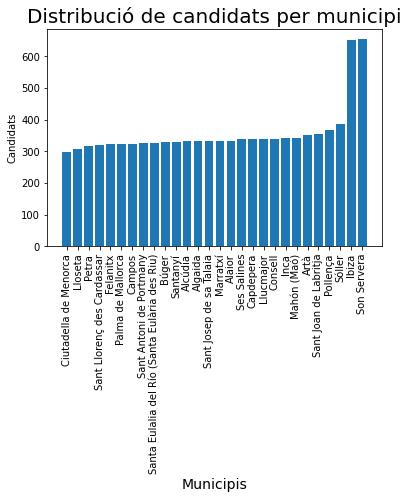

In [6]:
import matplotlib.pyplot as plt # !


tipus = df.groupby(["Municipi"]).size().sort_values()
x = tipus.index
y = tipus.values

fig, ax = plt.subplots() # Definició forma
ax.bar(x,y)
plt.title("Distribució de candidats per municipi",fontsize=20)
plt.xlabel('Municipis', fontsize=14)
plt.ylabel('Candidats')
plt.xticks(rotation=90)
plt.show()

- G) Quants candidats són "Apte Segons centre base"?

In [89]:
# És una sèrie booleana (0s i 1s) podem sumar els 1s.
aptes = df["Apte Segons centre base"].sum()
print(aptes)

print("Aptes %i d'un total de %i candidats"%(aptes,df.shape[0]))

9903
Aptes 9903 d'un total de 10000 candidats


## Nivell intermedi

- H) Crea una nova columna amb el "Tipus de Grau" de minusvalidesa o discapacitat (I,II,III,IV) segons aquestes franges de valors:
  - Grau I. Minusvalidesa nul·la 0%
  - Grau II. Minusvalidesa lleu 1-24%
  - Grau III. Minusvalidesa moderada 25-49%
  - Grau IV. Minusvalidesa greu 50-70%

In [4]:
df["%Minus"] #És una sèrie númerica (amb decimals)

# Una solució és crear una funció que donat un valor retorni el seu grau
# Després apliquem aquesta funció a tots elements d'aquesta sèrie (apply)

# a l'activitat "J" farem servir "cut" (una altra manera)


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: %Minus, Length: 10000, dtype: float64

In [5]:
# definició d'aquesta funció
def tipusGrau(value):
    if value == 0:
        return "I" 
    if value >= 1 and value <=24: 
        return "II"
    if value >= 25 and value <=49: 
        return "III"
    if value >= 50 and value <=70: 
        return "IV"
    return "V" #altra opció
# probes
print(tipusGrau(0.0))
print(tipusGrau(30.0))
print(tipusGrau(80.0))

I
III
V


In [6]:
# nova columna amb aquests valors retornats
df["Tipus de grau"] = df["%Minus"].apply(tipusGrau)
df.head()

,DNI,Id. Empleat,Tipus de sol�licitud,CP,Telefon,DataNaix,Sexe,Email per notificacions,CP per notificacions,%Minus,...,Comprobar amb pol. lingüística,proba física superada,carnet conducir,examen1,examen2,examen3,examen4,examen5,Municipi,Tipus de grau
0,II257577,8070373,Certificat digital,7038,+34 098461235,20/08/2000,M,dfztat@outlook.com,7991,0.0,...,True,True,Sí,6.35,4.78,NP,7.05,3.68,Consell,I
1,HS660732,7386220,PreZëncial,7805,+34 399253088,24/10/1991,F,avnxqe@hotmail.com,7792,0.0,...,True,True,Sí,10.0,7.48,5.71,9.05,10.0,Ibiza,I
2,WA908227,7334248,PreZëncial,7500,+34 665691484,24/02/1974,M,rydxirj@example.com,7803,0.0,...,True,True,Sí,10.0,NP,NP,2.96,5.12,Campos,I
3,50963304L,5531649,Certificat digital,7038,+34 934536489,14/01/1999,F,vkfbbn@yahoo.com,7603,0.0,...,True,True,No,8.1,10.0,4.89,8.09,0.0,Consell,I
4,68499030Q,4175935,PreZëncial,7950,+34 293929218,11/08/1994,M,fovigdyjj@yahoo.com,7516,0.0,...,True,True,Sí,6.34,8.67,4.76,6.11,6.05,Búger,I


- J) Com és la distribució del "tipus de minusvalidesa o discapacitat" ?

In [7]:
# Hi moltes maneres de trobar la quantitat d'elements d'una "categoria"/valors, per ventura una opció és el método  np.unique() de numpy

import numpy as np


# retorna els valors unics i en aquest casas (return_counts) la seva repetició
grau, valors = np.unique(df["Tipus de grau"],return_counts=True)
print(grau)
print(valors)

# o donats en altra format:
formatDict = dict(zip(grau,valors))
print(formatDict)


['I' 'II' 'III' 'IV']
[9044  569  206  181]
{'I': 9044, 'II': 569, 'III': 206, 'IV': 181}


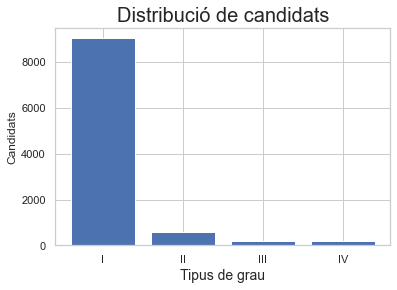

In [13]:
import matplotlib.pyplot as plt # !

x = grau
y = valors

fig, ax = plt.subplots() # Definició forma
ax.bar(x,y)
plt.title("Distribució de candidats",fontsize=20)
plt.xlabel('Tipus de grau', fontsize=14)
plt.ylabel('Candidats')

plt.show()


- K) Quants candidats hi ha entre 18 i 30 anys, entre 30 i 40 anys, i més de 45 anys? 

In [15]:
# Per resoldre aquesta questió necessitem trobar primer els anys i després podem fer aquestes agrupacions d'edats
# 1º Anys?


In [16]:
# Creem una nova sèrie del tipus "datatime" amb la "data de naixement"
df["dataNaix2"] = pd.to_datetime(df["DataNaix"],format="%d/%m/%Y")

In [17]:
# Hem de tindre la data d'avui
import datetime
today = datetime.datetime.now()
today

datetime.datetime(2023, 10, 17, 10, 13, 21, 241040)

In [18]:
# Podem operar matemàticament aquestes sèries temporals
# retorna un valor del tipus "timedelta"
today - df["dataNaix2"]

0       8458 days 10:13:21.241040
1      11681 days 10:13:21.241040
2      18132 days 10:13:21.241040
3       9042 days 10:13:21.241040
4      10659 days 10:13:21.241040
                  ...            
9995   11895 days 10:13:21.241040
9996    7362 days 10:13:21.241040
9997   10202 days 10:13:21.241040
9998    9233 days 10:13:21.241040
9999   10608 days 10:13:21.241040
Name: dataNaix2, Length: 10000, dtype: timedelta64[ns]

In [19]:
# Aquest valor "timedelta" ho podem transformar a "years"
# I ja tenim l'edat en anys
df["edat"]=(today - df["dataNaix2"]).astype('timedelta64[Y]')
df.head()

,DNI,Id. Empleat,Tipus de sol�licitud,CP,Telefon,DataNaix,Sexe,Email per notificacions,CP per notificacions,%Minus,...,carnet conducir,examen1,examen2,examen3,examen4,examen5,Municipi,Tipus de grau,dataNaix2,edat
0,II257577,8070373,Certificat digital,7038,+34 098461235,20/08/2000,M,dfztat@outlook.com,7991,0.0,...,Sí,6.35,4.78,NP,7.05,3.68,Consell,I,2000-08-20,23.0
1,HS660732,7386220,PreZëncial,7805,+34 399253088,24/10/1991,F,avnxqe@hotmail.com,7792,0.0,...,Sí,10.0,7.48,5.71,9.05,10.0,Ibiza,I,1991-10-24,31.0
2,WA908227,7334248,PreZëncial,7500,+34 665691484,24/02/1974,M,rydxirj@example.com,7803,0.0,...,Sí,10.0,NP,NP,2.96,5.12,Campos,I,1974-02-24,49.0
3,50963304L,5531649,Certificat digital,7038,+34 934536489,14/01/1999,F,vkfbbn@yahoo.com,7603,0.0,...,No,8.1,10.0,4.89,8.09,0.0,Consell,I,1999-01-14,24.0
4,68499030Q,4175935,PreZëncial,7950,+34 293929218,11/08/1994,M,fovigdyjj@yahoo.com,7516,0.0,...,Sí,6.34,8.67,4.76,6.11,6.05,Búger,I,1994-08-11,29.0


In [20]:
# 2. Amb l'edat fem aquesta distribució:
#  --- entre 18 i 30 anys, entre 30 i 40 anys, i més de 45 anys? 

import numpy as np

edat_bins = np.array([0,18,30,40,45,200])

values_per_bin = pd.cut(df["edat"],bins=edat_bins).value_counts()

print(values_per_bin)

#(18, 30]       3746
#(30, 40]       3161
#(45, 200!!]    1276

(18, 30]     3750
(30, 40]     3154
(40, 45]     1523
(45, 200]    1282
(0, 18]       291
Name: edat, dtype: int64


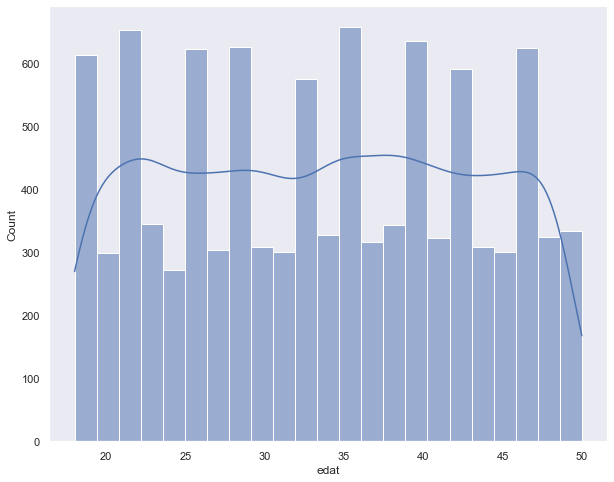

In [29]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(df,x="edat", kde=True)
plt.show()


- L) Quants candidats han superat 5 exàmens?


In [129]:
df.columns

Index(['DNI', 'Id. Empleat', 'Tipus de Sol·licitud', 'CP', 'Telefon',
       'DataNaix', 'Sexe', 'Email per notificacions', 'CP per notificacions',
       '%Minus', 'Adaptacio Centre base', 'Apte Segons centre base', 'exclos',
       'Niv cat', 'Comprobar amb pol. lingüística', 'proba física superada',
       'carnet conducir', 'examen1', 'examen2', 'examen3', 'examen4',
       'examen5', 'Municipi', 'Tipus de grau', 'dataNaix2', 'edat'],
      dtype='object')

In [ ]:
# hi ha 5 exàmens: examen1..examen5
# la superació implica: nota>=5 (False o True)
# superar 5 exàmens es pot veure com la suma de superació d'aquestes 5 columnes booleanes

# ex1_superat  ex2_superat ... ex5_superat
# 0 1 0 1 0 = 2 
# 1 1 1 1 1 = 5 !

In [30]:
# una primera aproximació:
df["examen1_sup"] = df["examen1"]>=5
df["examen2_sup"] = df["examen2"]>=5
df["examen3_sup"] = df["examen3"]>=5
df["examen4_sup"] = df["examen4"]>=5
df["examen5_sup"] = df["examen5"]>=5

# ALERTA: Les dades no son perfectes!!! Dona error

TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:
# podem veure que hi ha valors no númerics!! "NP" > NP no presentats?? 
df["examen1"].value_counts()

10.0    2486
NP       952
0.0      709
6.64      15
7.19      14
        ... 
8.45       1
3.17       1
0.2        1
1.49       1
0.4        1
Name: examen1, Length: 987, dtype: int64

In [31]:
# Podem transformar aquests valors NP a NaN i la sèrie a tipus numérica
df["examen1"].replace(to_replace = 'NP', value = np.NaN,inplace=True)
df["examen1"] = df["examen1"].astype(float)

In [32]:
df["examen1"]>=5.0 ## Funciona! 

0        True
1        True
2        True
3        True
4        True
        ...  
9995    False
9996     True
9997     True
9998     True
9999    False
Name: examen1, Length: 10000, dtype: bool

In [33]:
# Fem la resta de columnes examen2..examen5
df.columns[-8:-4]

Index(['examen2', 'examen3', 'examen4', 'examen5'], dtype='object')

In [34]:
cols = df.columns[-8:-4].values
print(cols)

['examen2' 'examen3' 'examen4' 'examen5']


In [35]:
df[cols] = df[cols].replace({'NP':np.NaN})

df["examen3"].head() #check?

0     NaN
1    5.71
2     NaN
3    4.89
4    4.76
Name: examen3, dtype: object

In [36]:
df["examen2"] = df["examen2"].astype(float)
df["examen3"] = df["examen3"].astype(float)
df["examen4"] = df["examen4"].astype(float)
df["examen5"] = df["examen5"].astype(float)
#tambe podem fer un for
# for i in range(2,6):
#    df["examen%i"%i] = df["examen%i"%i].astype(float)


In [37]:
# i ara?
df["examen1_sup"] = df["examen1"]>=5
df["examen2_sup"] = df["examen2"]>=5
df["examen3_sup"] = df["examen3"]>=5
df["examen4_sup"] = df["examen4"]>=5
df["examen5_sup"] = df["examen5"]>=5

In [38]:
df.columns[-5:]

Index(['examen1_sup', 'examen2_sup', 'examen3_sup', 'examen4_sup',
       'examen5_sup'],
      dtype='object')

In [39]:
df[df.columns[-5:]].sum(axis=1) #una sèrie amb ex. superats

0       2
1       5
2       2
3       3
4       4
       ..
9995    4
9996    2
9997    4
9998    3
9999    3
Length: 10000, dtype: int64

In [40]:
cant5examens = (df[df.columns[-5:]].sum(axis=1) == 5).sum() 
print("Candidats amb 5 exàmenes superats:",cant5examens)

Candidats amb 5 exàmenes superats: 850


<AxesSubplot:ylabel='Count'>

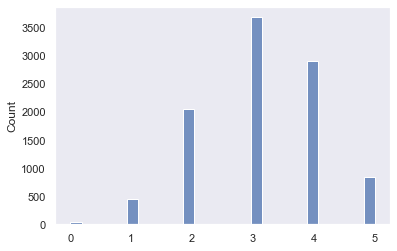

In [50]:
df_tmp = df[df.columns[-5:]].sum(axis=1)

sns.histplot(df_tmp)

(array([  34.,  453., 2055., 3692., 2916.,  850.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <BarContainer object of 6 artists>)

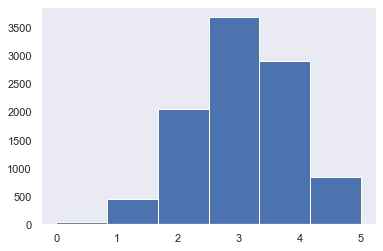

In [66]:
plt.hist(df_tmp,bins=6)

- M) Quants candidats han superat almenys 3 exàmens?

In [176]:
cant3examens = (df[df.columns[-5:]].sum(axis=1) >= 3).sum() 
print("Candidats amb almenys 3 exàmenes superats:",cant3examens)

Candidats amb almenys 3 exàmenes superats: 8920


In [73]:
#un plot
print(df[df.columns[-5:]].sum(axis=1).value_counts().sort_index())


0      34
1     453
2    2055
3    3692
4    2916
5     850
dtype: int64

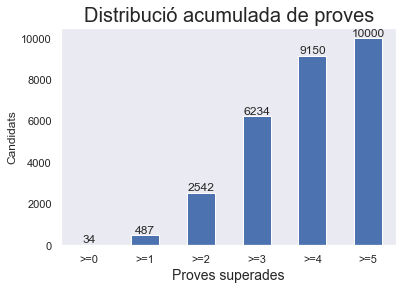

In [91]:

fig, ax = plt.subplots() # Definició forma
serie = df[df.columns[-5:]].sum(axis=1).value_counts().sort_index().cumsum()
ax = serie.plot(kind="bar")
ax.set_xticklabels([">=%i"%i  for i in range(6)])
plt.title("Distribució acumulada de proves",fontsize=20)
plt.xlabel('Proves superades', fontsize=14)
plt.ylabel('Candidats')
plt.xticks(rotation=0)

for bars in ax.containers: #numero damunt de cada bar
    ax.bar_label(bars)

plt.show()

- N) Quants candidats no han superat cap examen?

In [177]:
cant0examens = (df[df.columns[-5:]].sum(axis=1) == 0).sum() 
print("Candidats amb cap exàmen superat:",cant0examens)

Candidats amb cap exàmen superat: 1


## Nivell avançat

P1) Crearem una llista de candidats on seran marcats com a ```descartats``` tots aquells que:
- El seu nivell de català sigui A1,
- No estiguin aptes segons "Comprobació amb política lingüística",
- Hagin suspès o no s'hagin presentat a dues proves/"examenes".

In [178]:
# Aquesta resolució requereix una comprovació lògica de múltiples columnes
df.columns

Index(['DNI', 'Id. Empleat', 'Tipus de Sol·licitud', 'CP', 'Telefon',
       'DataNaix', 'Sexe', 'Email per notificacions', 'CP per notificacions',
       '%Minus', 'Adaptacio Centre base', 'Apte Segons centre base', 'exclos',
       'Niv cat', 'Comprobar amb pol. lingüística', 'proba física superada',
       'carnet conducir', 'examen1', 'examen2', 'examen3', 'examen4',
       'examen5', 'Municipi', 'Tipus de grau', 'dataNaix2', 'edat',
       'examen1_sup', 'examen2_sup', 'examen3_sup', 'examen4_sup',
       'examen5_sup'],
      dtype='object')

In [183]:
df['Niv cat'] == "A1"

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Niv cat, Length: 10000, dtype: bool

In [182]:
df['Comprobar amb pol. lingüística'] == True

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: Comprobar amb pol. lingüística, Length: 10000, dtype: bool

Hi ha tres tipus d'operadors damunt d'una sèrie: 
- & and
- | or
- ~ not

In [186]:
(df['Niv cat'] == "A1") | (df['Comprobar amb pol. lingüística'] == True)

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Length: 10000, dtype: bool

In [188]:
# suspens dues probes?
df[df.columns[-5:]].sum(axis=1) <= 2

0        True
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [189]:
# no presentat a dues probes: NP ?
# alerta! Comprovem com es comporta NaN en la comparatives (>=5) ja que sinó es consideren hauríem de replantejar-nos la informació que tenim.
np.NaN < 1 
# es False.. significa que si tenim un False en un NP, es que no està superat! perfecte!

False

In [190]:
# el criteri per considerar una candidat com a descartat
ix = (df['Niv cat'] == "A1") | (df['Comprobar amb pol. lingüística'] == True) | (df[df.columns[-5:]].sum(axis=1) <= 2)

In [193]:
ix.value_counts()
# hi ha 97 candidats descartats

True     9903
False      97
dtype: int64

In [195]:
~ix #la negació de la sèrie dona els 97 candidats que cerquem

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [196]:
df["Descartats"] = ~ix #solucio
df.head()

,DNI,Id. Empleat,Tipus de Sol·licitud,CP,Telefon,DataNaix,Sexe,Email per notificacions,CP per notificacions,%Minus,...,Municipi,Tipus de grau,dataNaix2,edat,examen1_sup,examen2_sup,examen3_sup,examen4_sup,examen5_sup,Descartats
0,II257577,8070373,Certificat digital,7038,098461235,20/08/2000,M,dfztat@outlook.com,7991,0.0,...,Consell,I,2000-08-20,23.0,True,False,False,True,False,False
1,HS660732,7386220,Presencial,7805,399253088,24/10/1991,F,avnxqe@hotmail.com,7792,0.0,...,Ibiza,I,1991-10-24,31.0,True,True,True,True,True,False
2,WA908227,7334248,Presencial,7500,665691484,24/02/1974,M,rydxirj@example.com,7803,0.0,...,Campos,I,1974-02-24,49.0,True,True,True,False,True,False
3,50963304L,5531649,Certificat digital,7038,934536489,14/01/1999,F,vkfbbn@yahoo.com,7603,0.0,...,Consell,I,1999-01-14,24.0,True,True,False,True,False,False
4,68499030Q,4175935,Presencial,7950,293929218,11/08/1994,M,fovigdyjj@yahoo.com,7516,0.0,...,Búger,I,1994-08-11,29.0,True,True,False,True,True,False


In [197]:
df[df["Descartats"]] #la llista de descartats pels diferents criteris

,DNI,Id. Empleat,Tipus de Sol·licitud,CP,Telefon,DataNaix,Sexe,Email per notificacions,CP per notificacions,%Minus,...,Municipi,Tipus de grau,dataNaix2,edat,examen1_sup,examen2_sup,examen3_sup,examen4_sup,examen5_sup,Descartats
163,HQ656560,5865511,Presencial,7991,733223801,29/11/1986,M,eejknxgs@yahoo.com,7612,0.0,...,Petra,I,1986-11-29,36.0,True,True,True,False,True,True
174,05860923V,7634713,Presencial,7818,164877007,20/07/1983,F,absekrmvic@yahoo.com,7222,0.0,...,Sóller,I,1983-07-20,40.0,True,True,True,False,True,True
237,NO194053,9141770,Presencial,7544,024044436,17/04/1983,M,fgnahutanz@outlook.com,7494,0.0,...,Lloseta,I,1983-04-17,40.0,False,True,True,True,False,True
393,32280834N,1273782,Presencial,7950,635455363,13/10/1991,M,osnjgzmzj@example.com,7360,0.0,...,Búger,I,1991-10-13,31.0,False,True,True,True,False,True
640,56490249H,888782,Presencial,7121,702157962,09/10/2000,F,rolqchegda@example.com,7991,0.0,...,Alcúdia,I,2000-10-09,22.0,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9492,16803202T,7009751,Presencial,7612,056414820,03/12/2003,M,favzaxduk@yahoo.com,7038,0.0,...,Alaior,I,2003-12-03,19.0,True,True,True,True,False,True
9534,85038950S,9062868,Presencial,7747,123448569,21/05/1989,F,ugkwv@gmail.com,7805,0.0,...,Inca,I,1989-05-21,34.0,True,True,True,True,True,True
9640,64479129D,1937446,Presencial,7595,071604128,14/07/1999,M,svvqftqoxu@yahoo.com,7360,0.0,...,Llucmajor,I,1999-07-14,24.0,False,True,True,True,False,True
9714,71355135G,8699481,Correu electrònic,7612,385538898,30/10/1985,M,sngzd@hotmail.com,7603,20.0,...,Alaior,II,1985-10-30,37.0,True,True,True,False,False,True


In [198]:
df[~df["Descartats"]] #la llista de NO descartats !

,DNI,Id. Empleat,Tipus de Sol·licitud,CP,Telefon,DataNaix,Sexe,Email per notificacions,CP per notificacions,%Minus,...,Municipi,Tipus de grau,dataNaix2,edat,examen1_sup,examen2_sup,examen3_sup,examen4_sup,examen5_sup,Descartats
0,II257577,8070373,Certificat digital,7038,098461235,20/08/2000,M,dfztat@outlook.com,7991,0.0,...,Consell,I,2000-08-20,23.0,True,False,False,True,False,False
1,HS660732,7386220,Presencial,7805,399253088,24/10/1991,F,avnxqe@hotmail.com,7792,0.0,...,Ibiza,I,1991-10-24,31.0,True,True,True,True,True,False
2,WA908227,7334248,Presencial,7500,665691484,24/02/1974,M,rydxirj@example.com,7803,0.0,...,Campos,I,1974-02-24,49.0,True,True,True,False,True,False
3,50963304L,5531649,Certificat digital,7038,934536489,14/01/1999,F,vkfbbn@yahoo.com,7603,0.0,...,Consell,I,1999-01-14,24.0,True,True,False,True,False,False
4,68499030Q,4175935,Presencial,7950,293929218,11/08/1994,M,fovigdyjj@yahoo.com,7516,0.0,...,Búger,I,1994-08-11,29.0,True,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24574100A,2820323,Presencial,7950,383436630,24/03/1991,M,vdmsapza@hotmail.com,7595,0.0,...,Búger,I,1991-03-24,32.0,False,True,True,True,True,False
9996,JP059499,2142627,Presencial,7803,516464586,21/08/2003,F,cunplwqgdp@outlook.com,7792,0.0,...,Felanitx,I,2003-08-21,20.0,True,True,True,False,False,False
9997,MW766705,7838963,Presencial,7818,100503795,11/11/1995,N,ecjsutbk@gmail.com,7905,0.0,...,Sóller,I,1995-11-11,27.0,True,True,True,False,True,False
9998,35080487J,301678,Presencial,7603,346924141,07/07/1998,M,wibqaxe@outlook.com,7612,0.0,...,Son Servera,I,1998-07-07,25.0,True,True,True,False,False,False


P2) Ordenarem als restants candidats segons una nota final. La nota final és una mitjana ponderada dels cinc "examenes": 
```text
   examen1*10% + examen2*30% + examen3*30% + examen4*20% + examen5*10%
```
- Si tenen algun grau de discapacitat:<br/>
  - Grau II, el ```examen2``` té factor de 1.5 fins a un màxim de 10 punts<br/>
  - Grau III, ```examen2*3``` fins a un màxim de 10 punts<br/>
  - Grau IV, ```examen1*2``` i ```examen2*4``` fins a un màxim de 10 punts<br/>
- Si no té permís de conduir: perd 3 punts de la nota final<br/>

In [199]:
# Nota: els NP (no presentats) no forman part d'aquest calcul
# Aquesta formula podem calcular-la per passos

# 1º calcular el factor de "compensació" per discapacitat:


In [213]:
#definicio de la condicio i aplicada a cada serie
def factorGrauII(cond): #l'entrada d'aquesta funció son valors de la serie lógica de la condició =="II"
    if cond: 
        return 1.5
    return 1
df["examen2_co"] = df["examen2"]* (df["Tipus de grau"] == "II").apply(factorGrauII)
# Els nou valors no podem superar el 10
df["examen2_co"] = df["examen2_co"].clip(upper=10)
df["examen2_co"]

0        4.78
1        7.48
2        7.48
3       10.00
4        8.67
        ...  
9995     7.72
9996     7.49
9997    10.00
9998     8.19
9999     7.15
Name: examen2_co, Length: 10000, dtype: float64

In [216]:
def factorGrauIII(cond): #l'entrada d'aquesta funció son valors de la serie lógica de la condició =="II"
    if cond: 
        return 3
    return 1
df["examen2_co"] = df["examen2_co"]* (df["Tipus de grau"] == "III").apply(factorGrauIII)
# Els nou valors no podem superar el 10
df["examen2_co"] = df["examen2_co"].clip(upper=10)
df["examen2_co"]

0        4.78
1        7.48
2        7.48
3       10.00
4        8.67
        ...  
9995     7.72
9996     7.49
9997    10.00
9998     8.19
9999     7.15
Name: examen2_co, Length: 10000, dtype: float64

In [217]:
def factorGrauIVa(condEx1):
    if condEx1: 
        return 2
    return 1
def factorGrauIVb(condEx2): 
    if condEx2: 
        return 4
    return 1


df["examen2_co"] = df["examen2_co"]* (df["Tipus de grau"] == "IV").apply(factorGrauIVb)
df["examen1_co"] = df["examen1"]* (df["Tipus de grau"] == "IV").apply(factorGrauIVa)

df["examen2_co"] = df["examen2_co"].clip(upper=10)
df["examen1_co"] = df["examen1_co"].clip(upper=10)



In [225]:
df["NotaFinal"] = df["examen1_co"]*0.1 + df["examen2_co"]*0.3 + df["examen3"]*0.3 + df["examen4"]*0.2 + df["examen5"]*0.1
df["NotaFinal"]

0         NaN
1       7.767
2       6.061
3       6.895
4       6.490
        ...  
9995    7.271
9996    6.256
9997    6.924
9998    6.036
9999      NaN
Name: NotaFinal, Length: 10000, dtype: float64

In [222]:
# descompensació carnet conduir
df["carnet conducir"]== "No"

0       False
1       False
2       False
3        True
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: carnet conducir, Length: 10000, dtype: bool

In [223]:
def carnet(con): 
    if con: 
        return -3
    return 0
df["NotaFinal"] = df["NotaFinal"] + (df["carnet conducir"]=="No").apply(carnet)

In [224]:
df["NotaFinal"]

0         NaN
1       7.767
2       6.061
3       3.895
4       6.490
        ...  
9995    7.271
9996    6.256
9997    6.924
9998    6.036
9999      NaN
Name: NotaFinal, Length: 10000, dtype: float64

In [236]:
df[["DNI","Tipus de grau","NotaFinal"]].sort_values(by="NotaFinal",ascending=False)

,DNI,Tipus de grau,NotaFinal
2683,LD397134,I,9.860
2939,50348062G,I,9.790
3333,HA553320,I,9.683
9928,88530970Z,II,9.454
9897,61278794D,II,9.445
...,...,...,...
9965,RT883206,I,NaN
9969,32776561C,I,NaN
9976,GV425519,I,NaN
9980,70862741V,I,NaN


P3) Guarda en un fitxer CSV, les següents columnes nota final, DNI o Passaport i correu de notificació dels 10 primers candidats segons la seva nota final

In [237]:
df.columns

Index(['DNI', 'Id. Empleat', 'Tipus de Sol·licitud', 'CP', 'Telefon',
       'DataNaix', 'Sexe', 'Email per notificacions', 'CP per notificacions',
       '%Minus', 'Adaptacio Centre base', 'Apte Segons centre base', 'exclos',
       'Niv cat', 'Comprobar amb pol. lingüística', 'proba física superada',
       'carnet conducir', 'examen1', 'examen2', 'examen3', 'examen4',
       'examen5', 'Municipi', 'Tipus de grau', 'dataNaix2', 'edat',
       'examen1_sup', 'examen2_sup', 'examen3_sup', 'examen4_sup',
       'examen5_sup', 'Descartats', 'NotaFinal', 'examen2_co', 'examen1_co'],
      dtype='object')

In [238]:
df2 = df[["DNI","Email per notificacions","NotaFinal"]].sort_values(by="NotaFinal",ascending=False)[:10]

,DNI,Email per notificacions,NotaFinal
2683,LD397134,cjijdz@outlook.com,9.860
2939,50348062G,bwyflzs@gmail.com,9.790
3333,HA553320,bwwbmuujr@example.com,9.683
9928,88530970Z,qnuzpo@gmail.com,9.454
9897,61278794D,hdbiekxffr@example.com,9.445
4113,37949572D,nmzitq@outlook.com,9.369
8039,19371583V,aifjlot@yahoo.com,9.358
4890,50662010W,olmpzmaz@example.com,9.343
4744,14506292P,syejqbule@example.com,9.280
9784,57592214F,yvmtvjjwkz@yahoo.com,9.273


In [ ]:
df2.to_csv("top10Candidates.csv")


Q) Per una reclamació, un nombre de candidats ha repetit tres proves. El fitxer "data/candidats2.csv" conté aquests nous valors. Com fusionaries aquests valors en l'anterior fitxer, substituint els vells valors per aquests?

In [248]:
import pandas as pd

df1 = pd.read_csv("../lessons/data/candidats1.csv")
df2 = pd.read_csv("../lessons/data/candidats2.csv")

# una mica d'observacio
print(df.shape)
print(df.columns)
print(df2.shape)
print(df2.columns)
df2.head()

(10000, 35)
Index(['DNI', 'Id. Empleat', 'Tipus de Sol·licitud', 'CP', 'Telefon',
       'DataNaix', 'Sexe', 'Email per notificacions', 'CP per notificacions',
       '%Minus', 'Adaptacio Centre base', 'Apte Segons centre base', 'exclos',
       'Niv cat', 'Comprobar amb pol. lingüística', 'proba física superada',
       'carnet conducir', 'examen1', 'examen2', 'examen3', 'examen4',
       'examen5', 'Municipi', 'Tipus de grau', 'dataNaix2', 'edat',
       'examen1_sup', 'examen2_sup', 'examen3_sup', 'examen4_sup',
       'examen5_sup', 'Descartats', 'NotaFinal', 'examen2_co', 'examen1_co'],
      dtype='object')
(3333, 4)
Index(['DNI i/o Passport', 'examen1', 'examen3', 'examen5'], dtype='object')


,DNI i/o Passport,examen1,examen3,examen5
0,70943663W,0.00,7.18,3.64
1,36435499A,8.63,6.86,8.39
2,97609908R,8.69,8.73,0.00
3,RK585576,0.00,6.99,5.72
4,09103127A,4.46,6.60,1.97


In [256]:
# una manera: merge()
# atenció: també està el metodo .update()
dfall = df1.merge(df2,how="left",left_on='DNI', right_on="DNI i/o Passport")

In [266]:
dfall.head()
# les columnes repetides de l'esquerra tenem el suffix "_x" i les de la dreta "_y"
# hem de fusionar valors: NAN, netejar columnes i renombrar-les 


,DNI,Id. Empleat,Tipus de sol�licitud,CP,Telefon,DataNaix,Sexe,Email per notificacions,CP per notificacions,%Minus,...,examen1_x,examen2,examen3_x,examen4,examen5_x,Municipi,DNI i/o Passport,examen1_y,examen3_y,examen5_y
0,II257577,8070373,Certificat digital,7038,+34 098461235,20/08/2000,M,dfztat@outlook.com,7991,0.0,...,6.35,4.78,NP,7.05,3.68,Consell,NaN,6.35,NaN,NaN
1,HS660732,7386220,PreZëncial,7805,+34 399253088,24/10/1991,F,avnxqe@hotmail.com,7792,0.0,...,10.0,7.48,5.71,9.05,10.0,Ibiza,HS660732,8.49,6.62,7.15
2,HS660732,7386220,PreZëncial,7805,+34 399253088,24/10/1991,F,avnxqe@hotmail.com,7792,0.0,...,10.0,7.48,5.71,9.05,10.0,Ibiza,HS660732,10.0,7.47,4.88
3,WA908227,7334248,PreZëncial,7500,+34 665691484,24/02/1974,M,rydxirj@example.com,7803,0.0,...,10.0,NP,NP,2.96,5.12,Campos,NaN,10.0,NaN,NaN
4,50963304L,5531649,Certificat digital,7038,+34 934536489,14/01/1999,F,vkfbbn@yahoo.com,7603,0.0,...,8.1,10.0,4.89,8.09,0.0,Consell,NaN,8.1,NaN,NaN


In [265]:
dfall['examen1_y'].fillna(dfall["examen1_x"],inplace=True)
dfall.head()

,DNI,Id. Empleat,Tipus de sol�licitud,CP,Telefon,DataNaix,Sexe,Email per notificacions,CP per notificacions,%Minus,...,examen1_x,examen2,examen3_x,examen4,examen5_x,Municipi,DNI i/o Passport,examen1_y,examen3_y,examen5_y
0,II257577,8070373,Certificat digital,7038,+34 098461235,20/08/2000,M,dfztat@outlook.com,7991,0.0,...,6.35,4.78,NP,7.05,3.68,Consell,NaN,6.35,NaN,NaN
1,HS660732,7386220,PreZëncial,7805,+34 399253088,24/10/1991,F,avnxqe@hotmail.com,7792,0.0,...,10.0,7.48,5.71,9.05,10.0,Ibiza,HS660732,8.49,6.62,7.15
2,HS660732,7386220,PreZëncial,7805,+34 399253088,24/10/1991,F,avnxqe@hotmail.com,7792,0.0,...,10.0,7.48,5.71,9.05,10.0,Ibiza,HS660732,10.0,7.47,4.88
3,WA908227,7334248,PreZëncial,7500,+34 665691484,24/02/1974,M,rydxirj@example.com,7803,0.0,...,10.0,NP,NP,2.96,5.12,Campos,NaN,10.0,NaN,NaN
4,50963304L,5531649,Certificat digital,7038,+34 934536489,14/01/1999,F,vkfbbn@yahoo.com,7603,0.0,...,8.1,10.0,4.89,8.09,0.0,Consell,NaN,8.1,NaN,NaN


In [267]:
dfall['examen3_y'].fillna(dfall["examen3_x"],inplace=True)
dfall['examen5_y'].fillna(dfall["examen5_x"],inplace=True)

In [268]:
dfall.drop(columns=["DNI i/o Passport","examen1_x","examen3_x","examen5_x"],inplace=True)
dfall.head()

,DNI,Id. Empleat,Tipus de sol�licitud,CP,Telefon,DataNaix,Sexe,Email per notificacions,CP per notificacions,%Minus,...,Niv cat,Comprobar amb pol. lingüística,proba física superada,carnet conducir,examen2,examen4,Municipi,examen1_y,examen3_y,examen5_y
0,II257577,8070373,Certificat digital,7038,+34 098461235,20/08/2000,M,dfztat@outlook.com,7991,0.0,...,C1,True,True,Sí,4.78,7.05,Consell,6.35,NP,3.68
1,HS660732,7386220,PreZëncial,7805,+34 399253088,24/10/1991,F,avnxqe@hotmail.com,7792,0.0,...,B2,True,True,Sí,7.48,9.05,Ibiza,8.49,6.62,7.15
2,HS660732,7386220,PreZëncial,7805,+34 399253088,24/10/1991,F,avnxqe@hotmail.com,7792,0.0,...,B2,True,True,Sí,7.48,9.05,Ibiza,10.0,7.47,4.88
3,WA908227,7334248,PreZëncial,7500,+34 665691484,24/02/1974,M,rydxirj@example.com,7803,0.0,...,A2,True,True,Sí,NP,2.96,Campos,10.0,NP,5.12
4,50963304L,5531649,Certificat digital,7038,+34 934536489,14/01/1999,F,vkfbbn@yahoo.com,7603,0.0,...,B1,True,True,No,10.0,8.09,Consell,8.1,4.89,0.0


In [269]:
dfall.rename(columns = {"examen1_y":"examen1","examen3_y":"examen3","examen5_y":"examen5"}, inplace = True)

In [270]:
dfall.head()

,DNI,Id. Empleat,Tipus de sol�licitud,CP,Telefon,DataNaix,Sexe,Email per notificacions,CP per notificacions,%Minus,...,Niv cat,Comprobar amb pol. lingüística,proba física superada,carnet conducir,examen2,examen4,Municipi,examen1,examen3,examen5
0,II257577,8070373,Certificat digital,7038,+34 098461235,20/08/2000,M,dfztat@outlook.com,7991,0.0,...,C1,True,True,Sí,4.78,7.05,Consell,6.35,NP,3.68
1,HS660732,7386220,PreZëncial,7805,+34 399253088,24/10/1991,F,avnxqe@hotmail.com,7792,0.0,...,B2,True,True,Sí,7.48,9.05,Ibiza,8.49,6.62,7.15
2,HS660732,7386220,PreZëncial,7805,+34 399253088,24/10/1991,F,avnxqe@hotmail.com,7792,0.0,...,B2,True,True,Sí,7.48,9.05,Ibiza,10.0,7.47,4.88
3,WA908227,7334248,PreZëncial,7500,+34 665691484,24/02/1974,M,rydxirj@example.com,7803,0.0,...,A2,True,True,Sí,NP,2.96,Campos,10.0,NP,5.12
4,50963304L,5531649,Certificat digital,7038,+34 934536489,14/01/1999,F,vkfbbn@yahoo.com,7603,0.0,...,B1,True,True,No,10.0,8.09,Consell,8.1,4.89,0.0


In [ ]:
dfall.to_csv("nouFitxerFusionat.csv")